<a href="https://colab.research.google.com/github/chenboju/DeepLearning/blob/main/8_MNIST_Autoencoder_Denoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 16s 7ms/step - loss: 0.2598
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1714
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1571
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1503
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1458
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1422
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1396
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1376
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1360
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1346
Epoch 11/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1335
Epoch 12/20
469/469 [====================

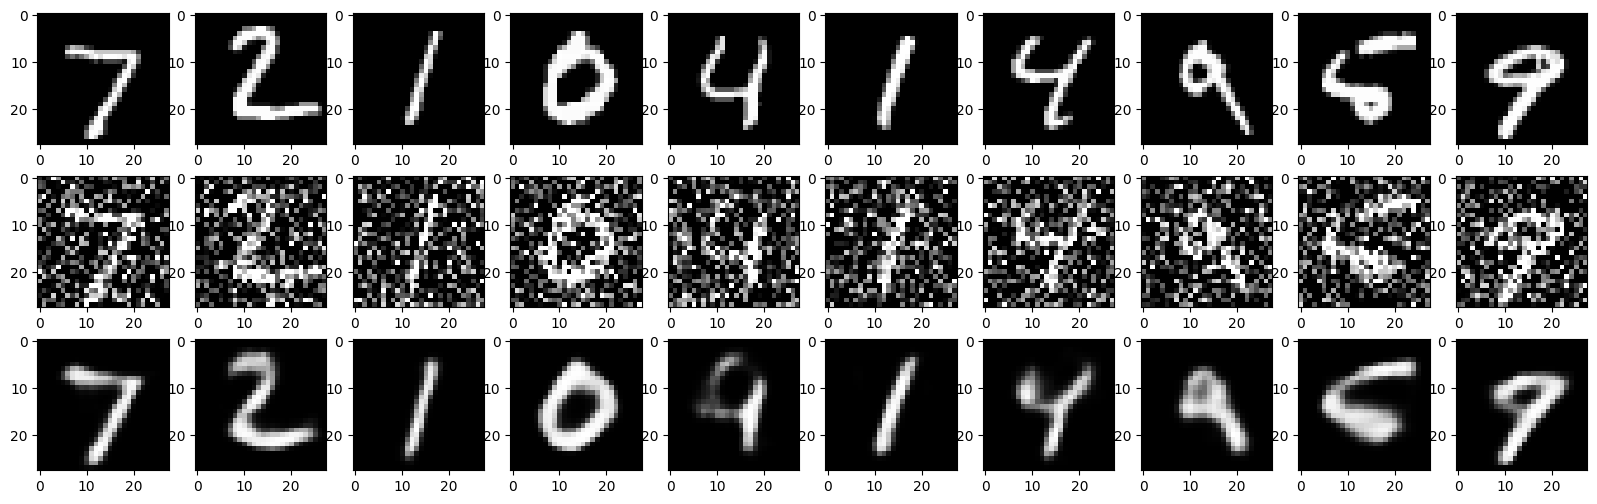

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#加入雜訊
noise_factor = 0.5
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#autoencoder模型建立
autoencoder=Sequential()
#encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#Decoder
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# 編譯模型，optimizer 使用 adam，loss 使用 binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 訓練 Autoencoder ，輸入是加入雜訊的圖片，輸出是原始圖片
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128)

#將有雜訊的測試影像丟入訓練好的模型進行訓練
denoised_images = autoencoder.predict(x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2], 1))

#繪製圖形
plt.figure(figsize=(20, 6))

for i in range(10):
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax = plt.subplot(3, 10, i+21)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
plt.show()